In [1]:
%matplotlib inline
import pandas as pd

In [2]:
cast = pd.read_csv('../dataset/cast.csv')

cast['decades'] = cast['year'] // 10 * 10

cast.head()

,title,year,name,type,character,n,decades
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,2010
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,1980
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,2010
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN,2010
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN,2010


In [3]:
release_dates = pd.read_csv('../dataset/release_dates.csv',
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [4]:
len(release_dates), len(cast),

# 244k movies
# 500k release_dates (titles by country)
# 4M   movies_by_cast

(479488, 3786176)

In [6]:
release_dates.date.head(), type(release_dates.date.head())

(0   2007-06-15
 1   2017-10-12
 2   2015-01-29
 3   2017-09-05
 4   2015-01-21
 Name: date, dtype: datetime64[ns], pandas.core.series.Series)

In [21]:
k = release_dates.date

year = k.dt.year.head()
day = k.dt.day.head()
day_of_year = k.dt.dayofyear.head()
day_of_week = k.dt.dayofweek.head()


day_of_week

# only series has .dt !!

0    4
1    3
2    3
3    1
4    2
Name: date, dtype: int64

In [24]:
# merge
# join is like merge but w/ different defaults
c = cast

c = c[c.name == 'Ellen Page']  #how can we get also release dates from release dataframe

c.merge(release_dates).head()

,title,year,name,type,character,n,decades,country,date
0,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,2000,Sweden,2007-12-07
1,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,2000,Greece,2008-05-15
2,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,2000,Spain,2008-06-13
3,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,2000,Finland,2008-07-18
4,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,2000,Mexico,2008-08-08


In [28]:
# pivot
r = release_dates

r = r[r.title.str.startswith('Star Wars: Episode')]
r = r[r.country.str.startswith('U')]

r = r.pivot('title', 'country', 'date') # setindex, sortindex, unstack ops in 1 piece, but in very limited context

r.head()

country,UK,USA,Ukraine,United Arab Emirates,Uruguay
title,,,,,
Star Wars: Episode I - The Phantom Menace,1999-07-15,1999-05-19,NaT,1999-08-25,1999-07-02
Star Wars: Episode II - Attack of the Clones,2002-05-16,2002-05-16,2002-06-08,2002-05-16,2002-07-05
Star Wars: Episode III - Revenge of the Sith,2005-05-19,2005-05-19,NaT,2005-05-19,2005-05-18
Star Wars: Episode IX,NaT,2019-12-20,NaT,NaT,NaT
Star Wars: Episode V - The Empire Strikes Back,1980-05-21,1980-06-20,NaT,NaT,1981-01-15


In [7]:
# who is casting w/ Cary Grant , merging w/ same dataset
cg = cast
cg = cg[cg.name == 'Cary Grant']

cg.head()

,title,year,name,type,character,n,decades
871388,Alice in Wonderland,1933,Cary Grant,actor,Mock Turtle,10.0,1930
871389,An Affair to Remember,1957,Cary Grant,actor,Nickie Ferrante,1.0,1950
871390,Arsenic and Old Lace,1944,Cary Grant,actor,Mortimer Brewster,1.0,1940
871391,Big Brown Eyes,1936,Cary Grant,actor,Danny Barr,1.0,1930
871392,Blonde Venus,1932,Cary Grant,actor,Nick Townsend,3.0,1930


In [9]:
# who is casting w/ Cary Grant , merging w/ same dataset
cg = cast
cg = cg[cg.name == 'Cary Grant']

cg = cg.merge(cast, on=['title', 'year'])
cg = cg[cg.n_y <= 2] 
cg = cg[cg.name_y != 'Cary Grant']  # it also shows cary crant w/ cary grant (additional lines)

cg.head()

,title,year,name_x,type_x,character_x,n_x,decades_x,name_y,type_y,character_y,n_y,decades_y
0,Alice in Wonderland,1933,Cary Grant,actor,Mock Turtle,10.0,1930,Richard Arlen,actor,Cheshire Cat,1.0,1930
1,Alice in Wonderland,1933,Cary Grant,actor,Mock Turtle,10.0,1930,Roscoe Ates,actor,Fish,2.0,1930
106,An Affair to Remember,1957,Cary Grant,actor,Nickie Ferrante,1.0,1950,Deborah Kerr,actress,Terry McKay,2.0,1950
151,Arsenic and Old Lace,1944,Cary Grant,actor,Mortimer Brewster,1.0,1940,Priscilla Lane,actress,Elaine Harper,2.0,1940
202,Big Brown Eyes,1936,Cary Grant,actor,Danny Barr,1.0,1930,Joan Bennett,actress,Eve Fallon,2.0,1930


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


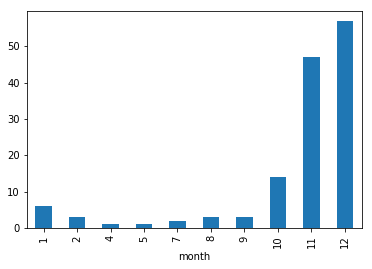

In [37]:
zzz = release_dates
zzz = zzz[(zzz.country == 'USA') & (zzz.title.str.contains('Christmas'))]

zzz['month'] = zzz.date.dt.month

zzz.groupby('month').size().plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


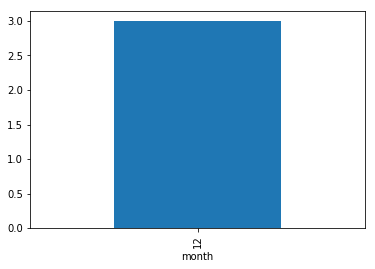

In [39]:
zzz = release_dates
zzz = zzz[(zzz.country == 'USA') & (zzz.title.str.startswith('The Hobbit'))]

zzz['month'] = zzz.date.dt.month

zzz.groupby('month').size().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


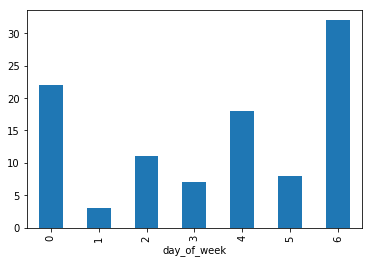

In [44]:
zzz = release_dates
zzz = zzz[(zzz.country == 'USA') & (zzz.title.str.contains('Romance'))]

zzz['day_of_week'] = zzz.date.dt.dayofweek

zzz.groupby('day_of_week').size().plot(kind='bar')

#monday=0, sunday=6

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


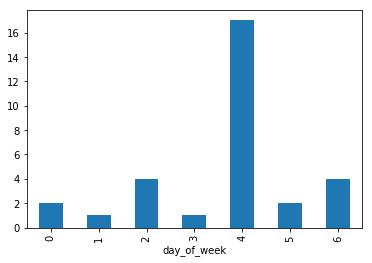

In [45]:
zzz = release_dates
zzz = zzz[(zzz.country == 'USA') & (zzz.title.str.contains('Action'))]

zzz['day_of_week'] = zzz.date.dt.dayofweek

zzz.groupby('day_of_week').size().plot(kind='bar')

#monday=0, sunday=6

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [51]:
rd = release_dates[release_dates.country == 'USA']


c = cast[(cast.name == 'Judi Dench') & (cast.decades == 1990)]
c.merge(rd)

,title,year,name,type,character,n,decades,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,1990,USA,1995-11-17
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,1990,USA,1996-12-25
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,1990,USA,1996-03-22
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,1990,USA,1997-10-03
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,1990,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,1990,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,1990,USA,1999-11-19
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,1990,USA,1997-12-19


### In which months do films with Judi Dench tend to be released in the USA?

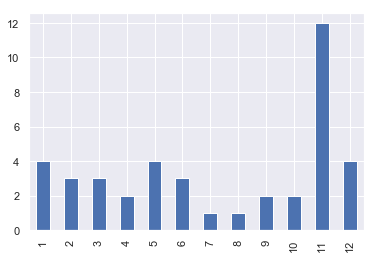

In [101]:
rd = release_dates[release_dates.country == 'USA']


c = cast[(cast.name == 'Judi Dench')]
c = c.merge(rd)

s = c.date.dt.month

s.value_counts().sort_index().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

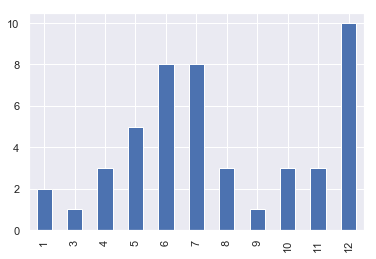

In [78]:
rd = release_dates[release_dates.country == 'USA']


c = cast[(cast.name == 'Tom Cruise')]
c = c.merge(rd)

s = c.date.dt.month

s.value_counts().sort_index().plot(kind='bar')